<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

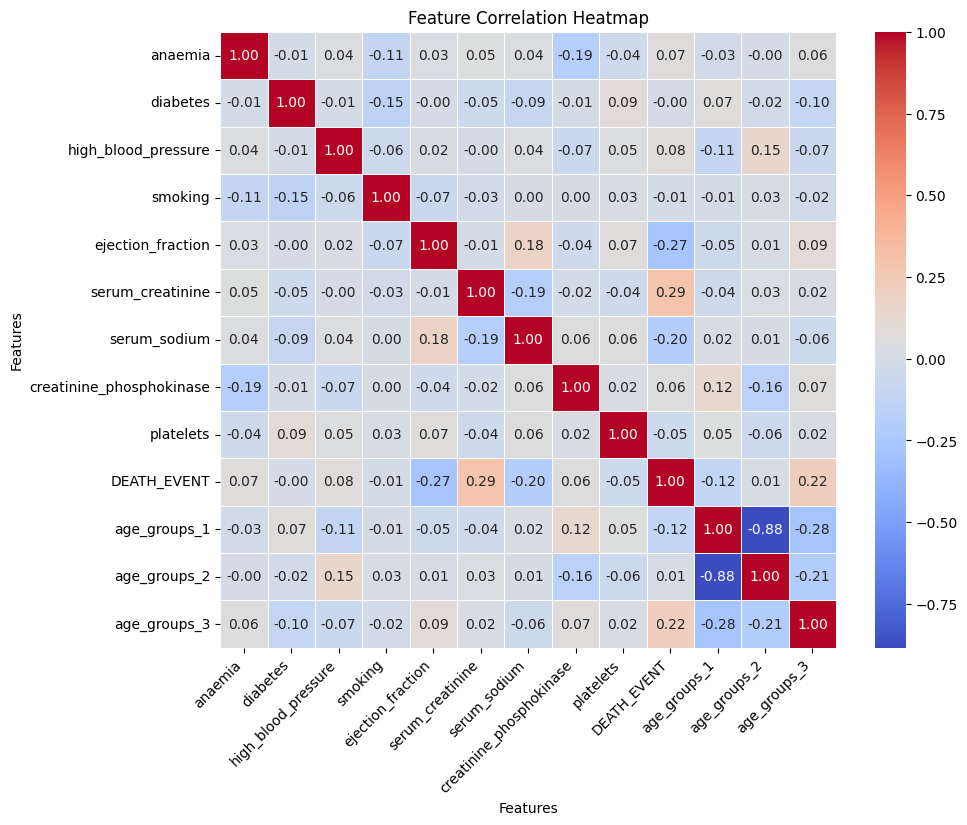

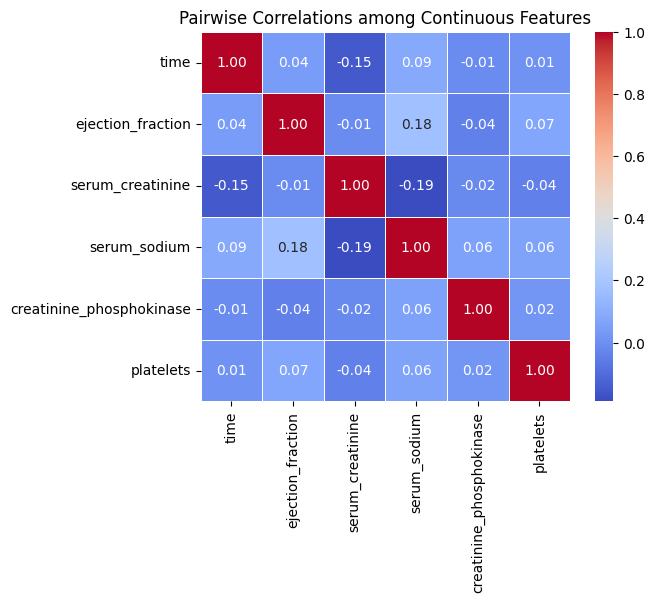

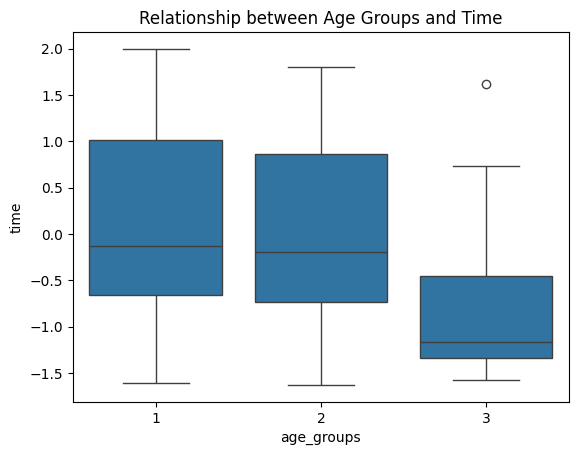

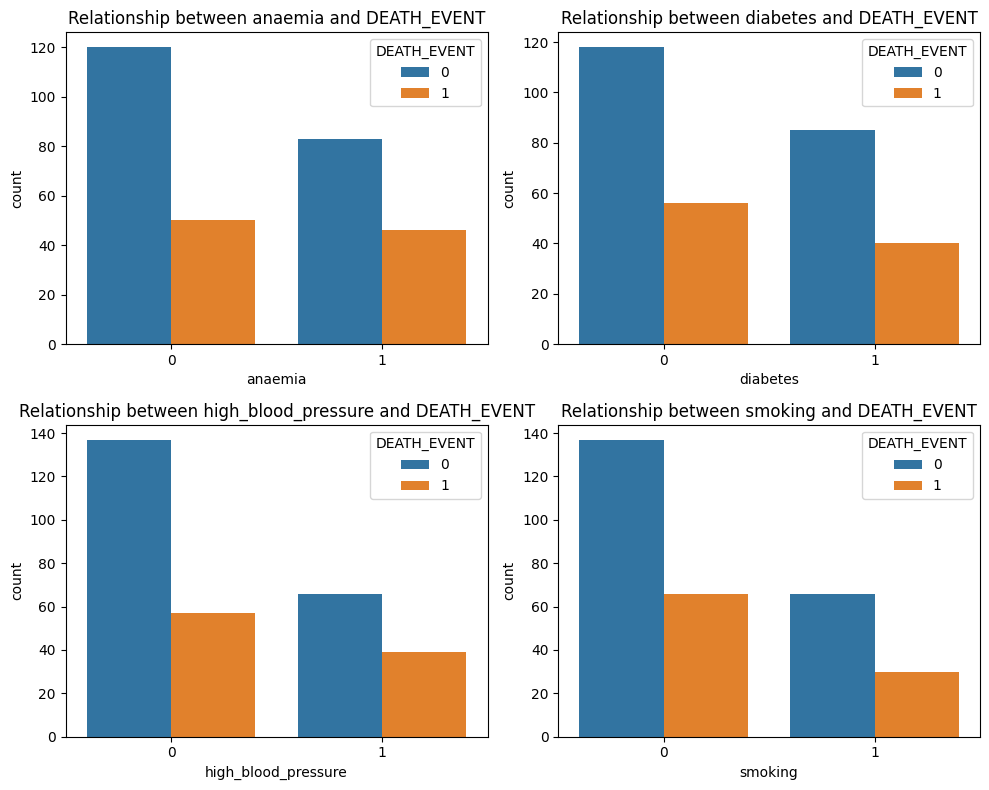

Accuracy: 0.8
Confusion Matrix:
 [[34  1]
 [11 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Cross-Validation Scores: [0.8        0.8        0.83333333 0.86666667 0.8        0.96666667
 0.86666667 0.76666667 0.6        0.86206897]
Average Cross-Validation Score: 0.8162068965517241
En İyi Parametreler: {'C': 1.9894240408880515, 'solver': 'lbfgs'}
En İyi Skor: 0.7931656754386582
Accuracy (En İyi Hiperparametre):
 0.7833333333333333
Confusion Matrix (En İyi Hiperparametre):
 [[34  1]
 [12 13]]
Classification Report (En iyi Hiperparametre):
               precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52    

In [15]:
#Importing necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import uniform


#Converting the dataset to Pandas Dataframe that contains clinical records of patients who have heart failures
veri = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")


#Verifying the datasets consistency via using related Pandas functions
print(veri.info())

print(veri.describe())

print(veri.isnull().sum())

print(veri.shape)

print(veri.head(10))


#Doing feature engineering via filtering ages into 3 groups with Pandas cut method
veri["age_groups"] = pd.cut(veri["age"], bins=[0, 35, 60, 80, float("inf")], labels=["Young", "Middle-Aged", "Old", "Very Old"])
veri['age_groups'] = veri['age_groups'].astype('category').cat.codes

#Validate category codes to ensure there's no missing values
print("Category Codes:")
print(veri["age_groups"].unique())  #Should not have -1

#List of continuous features
continuous_features = ["time", "ejection_fraction", "serum_creatinine", "serum_sodium", "creatinine_phosphokinase", "platelets"]

#Using StandardScaler method to scale numerical and continous features properly
scaler = StandardScaler()
veri[continuous_features] = scaler.fit_transform(veri[continuous_features])

#Encoding categorical features
encoder = OneHotEncoder(sparse_output=False)
age_groups_encoded = encoder.fit_transform(veri[["age_groups"]])
veri = pd.concat([veri, pd.DataFrame(age_groups_encoded, columns=encoder.get_feature_names_out(["age_groups"]))], axis=1)

#Coding the target and feature variable as X and y. Droping target variable from feature veriable to prevent duplication
X = veri.drop("DEATH_EVENT", axis=1)
y = veri["DEATH_EVENT"]

#Splitting the data as train and test groups to prevent overfitting and improve models generalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a feature list that contains variabels in dataset to do EDA via creating a heatmap
feature_list = ["anaemia", "diabetes", "high_blood_pressure", "smoking",
                "ejection_fraction", "serum_creatinine",
                "serum_sodium", "creatinine_phosphokinase", "platelets",
                "DEATH_EVENT"]

#Adds the one-hot encoded age groups columns to the feature list
feature_list.extend(encoder.get_feature_names_out(["age_groups"]))

correlation = veri[feature_list].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=.5, cbar=True, square=True)

#Seting titles and labels to heatmap
plt.title("Feature Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

#Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()


#Pairwise correlations among continuous features
correlation_matrix = veri[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, square=True)
plt.title("Pairwise Correlations among Continuous Features")
plt.show()

#Boxplot to visualize the relationship between age groups and the target variable
sns.boxplot(x="age_groups", y="time", data=veri)
plt.title("Relationship between Age Groups and Time")
plt.show()

#Grouped bar plot to see relationships with categorical features
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

plt.figure(figsize=(10, 8))
for idx, feature in enumerate(categorical_features):
    plt.subplot(2, 2, idx + 1)
    sns.countplot(x=feature, hue="DEATH_EVENT", data=veri)
    plt.title(f'Relationship between {feature} and DEATH_EVENT')
plt.tight_layout()
plt.show()

#Deploying the ML model that going to be used in process
model = LogisticRegression()

#Training the model
model.fit(X_train, y_train)

#Predicting the model
y_pred = model.predict(X_test)

#Evaluating the model before further tuning
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix_report = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_report)

classification_report_var = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_var)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

#Creating a dictionary that contains parameters and possible range of values of LogisticRegression for Hyperparameter Tuning
param_dist = {
    'C': uniform(loc=0.001, scale=10),
    'solver': ['liblinear', 'lbfgs']
}

#Deploying Hyperparameter Tuning model
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1_macro',
    cv=5,
    random_state=42
)

random_search.fit(X_train, y_train)

#Extracting best parameters and scores
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"En İyi Parametreler: {best_params}")
print(f"En İyi Skor: {best_score}")

#Executing the model with best parameters which found by RandomizedSearchCV
y_pred = best_model.predict(X_test)

#Evaluating the model after hyperparameter tuning
accuracy_hyper = accuracy_score(y_test, y_pred)
print("Accuracy (En İyi Hiperparametre):\n", accuracy_hyper)

confusion_matrix_hyper = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (En İyi Hiperparametre):\n", confusion_matrix_hyper)

classification_report_hyper = classification_report(y_test, y_pred)
print("Classification Report (En iyi Hiperparametre):\n", classification_report_hyper)

print("Done!")
